# Figures for section 2 of the SYGMA paper

#### I choose a SSP of $10^6$ Msun at Z=0.02 for a better comparison with other works.

In [7]:
#%matplotlib nbagg
import matplotlib.pyplot as plt
import sys
import sygma as s
reload(s)
reload(s)
import numpy as np
print s.global_path
import matplotlib
%matplotlib inline

/Users/christian/NuGrid/NuPyCEE/


In [3]:
s1=s.sygma(iniZ=0.02,
           #table='yield_tables/isotope_yield_table_MESA_only_fryer12_delay.txt',
           stellar_param_table='yield_tables/stellar_feedback_nugrid_MESAonly.txt',
           mgal=1e6,special_timesteps=200,dt=1e6,exclude_masses=[],stellar_param_on=True,
           table='yield_tables/agb_and_massive_stars_nugrid_MESAonly_fryer12delay.txt',
          sn1a_energy=1e51,nb_1a_per_m = 3.0e-3)

SYGMA run in progress..
   SYGMA run completed - Run time: 7.09s


## Fig. 1

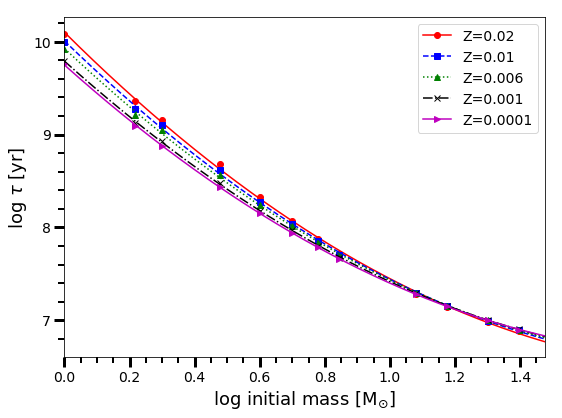

In [9]:
fign=1
fig=plt.figure(fign)
ax=plt.gca()
marker=['o','s','^','x','>']
linestyle=['-','--',':','-.','-']
color=['r','b','g','k','m']
#from yield grid
[masses_y,lifetimes_y,metallicities_y]=s1.lifetime_yield_input
#from mass-metallicity fit    
[metallicities,masses,lifetimes]=s1.zm_lifetime_grid_nugrid
masses = np.log10(masses)
#masses_y=np.log10(np.array(masses_y))
#lifetimes_y = np.log10(lifetimes_y)
for k in range(len(masses_y)):
        plt.plot(np.log10(masses_y[k]),np.log10(lifetimes_y[k]),marker=marker[k],linestyle="None",color=color[k])
        idx = min(range(len(metallicities)), key=lambda i: abs(metallicities[i]-metallicities_y[k]))
        plt.plot(masses,lifetimes[idx],linestyle=linestyle[k],color=color[k])
        plt.plot([],[],marker=marker[k],linestyle=linestyle[k],label='Z='+str(metallicities_y[k]),color=color[k])
plt.xlabel('log initial mass [M$_{\odot}$]')
plt.ylabel(r'log $\tau$ [yr]')
plt.xlim(0,np.log10(30))
ax.set_yticks([7,8,9,10])
plt.legend(loc=1,fontsize=14)
plt.minorticks_on()
#style
fig.set_size_inches(8,6,forward=True)
ax.tick_params(length=6,width=2,which='both')
ax.tick_params(length=10,width=3,which='major')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
plt.tight_layout(h_pad=1.,pad=1.)
matplotlib.rcParams.update({'font.size': 20})
fig.savefig('lifetime_fit.pdf', dpi=100)

## Fig. 2

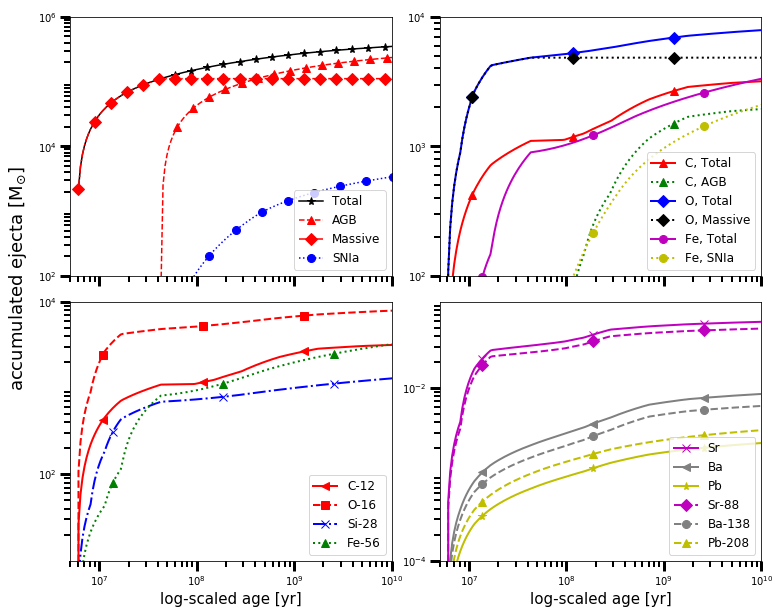

In [10]:
#%matplotlib nbagg
%matplotlib inline
fign = fign + 1
f, axarr = plt.subplots(2, 2,num=fign)
markevery=50
props = dict(boxstyle='square', facecolor='w', alpha=1)
for specie in ['Total','Ele','Ele_all','Iso_all']:
        if specie=='Total':
            plt.sca(axarr[0, 0])
        if specie=='Ele':
            plt.sca(axarr[0, 1])
        elif specie=='Ele_all':
            plt.sca(axarr[1, 0])
        elif specie=='Iso_all':
            plt.sca(axarr[1, 1])    
        ax=plt.gca()
        if specie == 'Total':
            markevery=8            
            s1.plot_totmasses(fig=fign,source='all',label='Total',markevery=markevery,color='k',marker='*')
            s1.plot_totmasses(fig=fign,source='agb',markevery=markevery,color='r',marker='^')
            s1.plot_totmasses(fig=fign,source='massive',markevery=markevery,color='r',marker='D')
            s1.plot_totmasses(fig=fign,source='sn1a',markevery=markevery+5,color='b',marker='o')         
            plt.legend(loc=4,fontsize=12)
            ax.get_xaxis().set_ticklabels([])
            ax.set_xlabel('')     
            ax.set_yticks([1e2,1e4,1e6])
            ax.set_ylim(1e2,1e6)
            ax.set_ylabel('')
        elif specie == 'Ele':
            markevery=50
            #why was that commented???
            s1.plot_mass(fig=fign,specie='C',source='all',label='C, Total',markevery=markevery,color='r',marker='^')
            s1.plot_mass(fig=fign,specie='C',source='agb',label='C, AGB',markevery=markevery,color='g',marker='^',shape=':')

            s1.plot_mass(fig=fign,specie='O',source='all',label='O, Total',markevery=markevery,color='b',marker='D')
            s1.plot_mass(fig=fign,specie='O',source='massive',label='O, Massive',markevery=markevery,color='k',marker='D',shape=':')

            s1.plot_mass(fig=fign,specie='Fe',source='all',label='Fe, Total',markevery=markevery+5,color='m',marker='o')    
            s1.plot_mass(fig=fign,specie='Fe',source='sn1a',markevery=markevery+5,label='Fe, SNIa',color='y',marker='o',shape=':')    
            plt.legend(loc=4,fontsize=12)
            plt.ylim(1e2,1e4)
            ax.get_xaxis().set_ticklabels([])
            ax.set_xlabel('')      
            ax.set_ylabel('')
        elif specie == 'Ele_all':
            
            #s1.plot_mass(fig=fign,specie='C',source='all',markevery=markevery,color='r',marker='^')
            #s1.plot_mass(fig=fign,specie='O',source='all',markevery=markevery,color='r',marker='D')
            #s1.plot_mass(fig=fign,specie='Si',source='all',markevery=markevery+5,color='b',marker='o')  
            #s1.plot_mass(fig=fign,specie='Fe',source='all',markevery=markevery+5,color='g',marker='*')  
            s1.plot_mass(fig=fign,specie='C-12',source='all',markevery=markevery,color='r',marker='<',shape='-')
            s1.plot_mass(fig=fign,specie='O-16',source='all',markevery=markevery,color='r',marker='s',shape='--')
            s1.plot_mass(fig=fign,specie='Si-28',source='all',markevery=markevery+5,color='b',marker='x',shape='-.')  
            s1.plot_mass(fig=fign,specie='Fe-56',source='all',markevery=markevery+5,color='g',marker='^',shape=':')             
            plt.legend(loc=4,fontsize=12)  
            ax.set_yticks([1e-4,1e-2,1,1e2,1e4])
            plt.ylim(1e1,1e4)
            ax.set_ylabel('')
        else:

            s1.plot_mass(fig=fign,specie='Sr',source='all',markevery=markevery+5,color='m',marker='x')  
            s1.plot_mass(fig=fign,specie='Ba',source='all',markevery=markevery+5,color='grey',marker='<')  
            s1.plot_mass(fig=fign,specie='Pb',source='all',markevery=markevery+5,color='y',marker='*')  
            s1.plot_mass(fig=fign,specie='Sr-88',source='all',markevery=markevery+5,color='m',marker='D',shape='--')  
            s1.plot_mass(fig=fign,specie='Ba-138',source='all',markevery=markevery+5,color='grey',marker='o',shape='--')  
            s1.plot_mass(fig=fign,specie='Pb-208',source='all',markevery=markevery+5,color='y',marker='^',shape='--')  
            plt.legend()
            plt.legend(loc=4,fontsize=12) 
            ax.set_ylabel('') 
            ax.set_yticks([1e-4,1e-2,1,1e2,1e4])
            plt.ylim(1e-4,1e-1)
        plt.xlim(5e6,1e10)            
#general settings
fig=plt.gcf()        
fig.set_size_inches(20,10)
plt.subplots_adjust(hspace=0.1, bottom=0.125,wspace=0.15)   
plt.subplots_adjust(hspace=0.1, bottom=0.125,wspace=0.15,left=0.1,right=0.9)
fig=plt.gcf()        
fig.set_size_inches(14,10,forward=True)          
fig.set_size_inches(12,10,forward=True)          
fig.text(0.04, 0.65, r'accumulated ejecta [M$_{\odot}$]', ha='center',rotation='vertical',fontsize=18)
fig.savefig('chem_evo_overview.pdf', dpi=100) #save figure

## Fig. 3 (top)

<IPython.core.display.Javascript object>


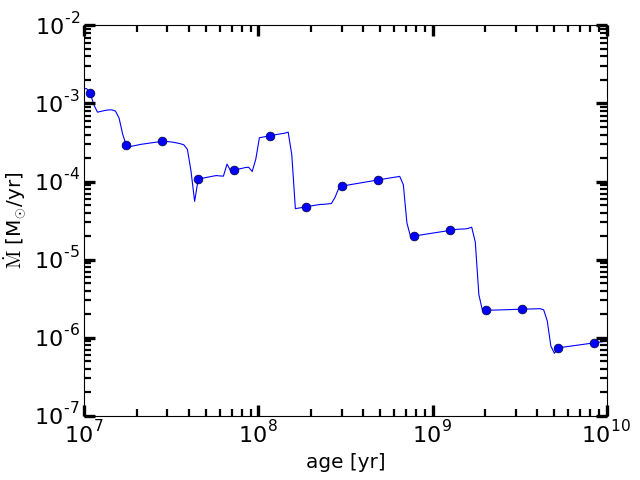

In [14]:
fign = fign + 1
fig=plt.figure(fign)
ax=plt.gca()
other='Mdot_wind' #s1.stellar_param_attrs
k=0
s1.plot_stellar_param(fig=fign,quantity=other,
label='10$^4$M$_{\odot}$ population',
marker='o',shape='-',color='b',markevery=10)
plt.xlabel('age [yr]')
plt.ylabel('$\dot{\mathrm{M}}$ [M$_{\odot}$/yr]')
plt.legend(loc=1,fontsize=14)
plt.xlim(1e7,1e10)
plt.legend().set_visible(False)
#style
fig.set_size_inches(8,6,forward=True)
ax.tick_params(length=6,width=2,which='both')
ax.tick_params(length=10,width=3,which='major')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
plt.tight_layout(h_pad=1.,pad=1.)
matplotlib.rcParams.update({'font.size': 20})
fig.savefig('mass_ejection.png', dpi=100)

SYGMA run in progress..
   SYGMA run completed - Run time: 360.52s


<IPython.core.display.Javascript object>


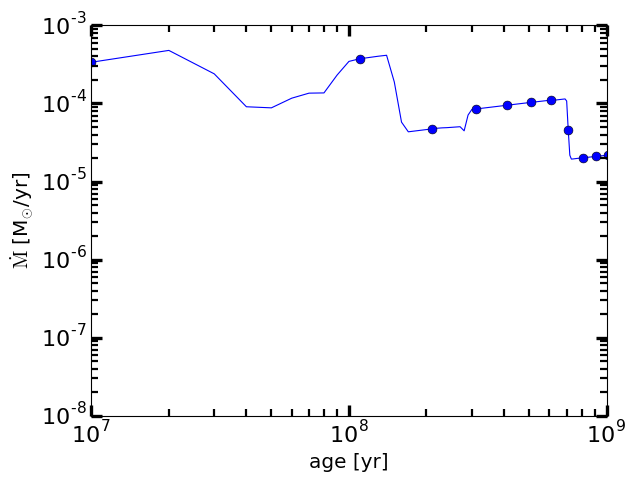

(1e-08, 0.001)

In [32]:
s11=s.sygma(iniZ=0.02,
           #table='yield_tables/isotope_yield_table_MESA_only_fryer12_delay.txt',
           stellar_param_table='yield_tables/stellar_feedback_nugrid_MESAonly.txt',
           mgal=1e6,special_timesteps=-1,dt=1e7,exclude_masses=[],stellar_param_on=True,
           table='yield_tables/agb_and_massive_stars_nugrid_MESAonly_fryer12delay.txt',
          sn1a_energy=1e51,nb_1a_per_m = 3.0e-3,tend=1e10)

fign = fign + 1
fig=plt.figure(fign)
ax=plt.gca()
other='Mdot_wind' #s1.stellar_param_attrs
k=0
s11.plot_stellar_param(fig=fign,quantity=other,
label='10$^4$M$_{\odot}$ population',
marker='o',shape='-',color='b',markevery=10)
plt.xlabel('age [yr]')
plt.ylabel('$\dot{\mathrm{M}}$ [M$_{\odot}$/yr]')
plt.legend(loc=1,fontsize=14)
plt.legend().set_visible(False)
#style
fig.set_size_inches(8,6,forward=True)
ax.tick_params(length=6,width=2,which='both')
ax.tick_params(length=10,width=3,which='major')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
plt.tight_layout(h_pad=1.,pad=1.)
matplotlib.rcParams.update({'font.size': 20})
plt.xscale('log')
plt.xlim(1e7,1e9)
plt.ylim(1e-8,1e-3)

<IPython.core.display.Javascript object>


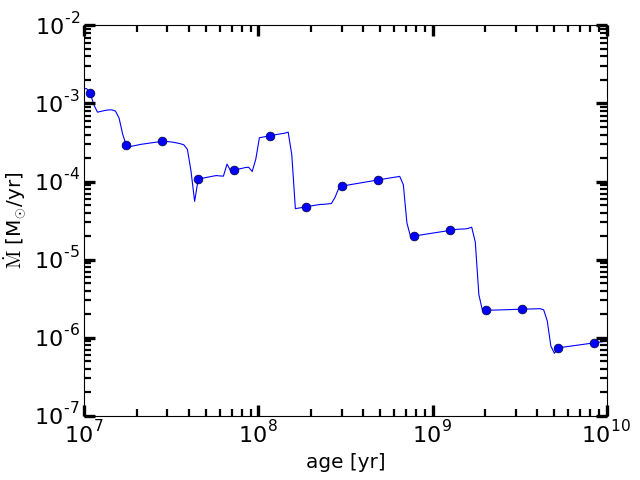

<IPython.core.display.Javascript object>


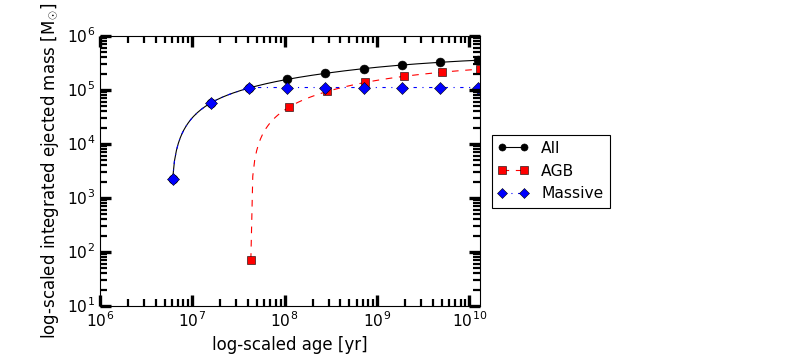

In [12]:
s1.plot_totmasses(fig=883,source='all')
s1.plot_totmasses(fig=883,source='agb')
s1.plot_totmasses(fig=883,source='massive')

## Fig. 3 (middle)

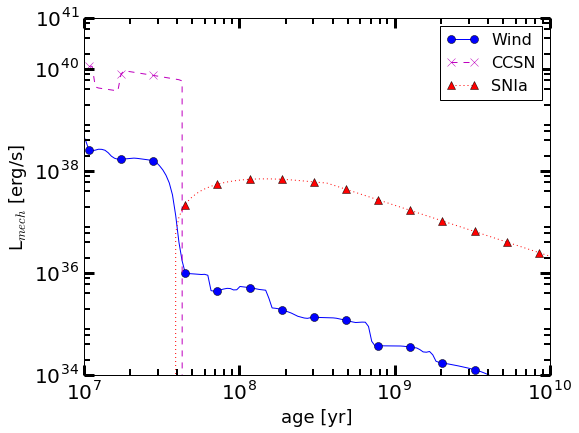

In [7]:
fign= fign + 1
fig=plt.figure(fign)
ax=plt.gca()
s1.plot_stellar_param(fig=fign,quantity='Ekindot_wind',
    label='Wind',marker='o',shape='-',color='b',markevery=10)
s1.plot_stellar_param(fig=fign,quantity='CCSN energy',label='CCSN',
                      marker='x',shape='--',color='m',markevery=10)
s1.plot_stellar_param(fig=fign,quantity='SNIa energy',label='SNIa',
                      marker='^',shape=':',color='r',markevery=10)
matplotlib.rcParams.update({'font.size': 20})
plt.xlabel('age [yr]')
plt.ylabel('L$_{mech}$ [erg/s]')
plt.xlim(1e7,1e10);plt.ylim(1e34,1e41)
ax.tick_params(length=6,width=2,which='both')
ax.tick_params(length=10,width=3,which='major')
ax.set_yticks([1e34,1e36,1e38,1e40,1e41])
plt.legend(loc=1,fontsize=16)
#style
fig.set_size_inches(8,6,forward=True)
ax.tick_params(length=6,width=2,which='both')
ax.tick_params(length=10,width=3,which='major')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
plt.tight_layout(h_pad=1.,pad=0.3)
matplotlib.rcParams.update({'font.size': 20})
fig.savefig('mech_lum.png', dpi=100)

<IPython.core.display.Javascript object>


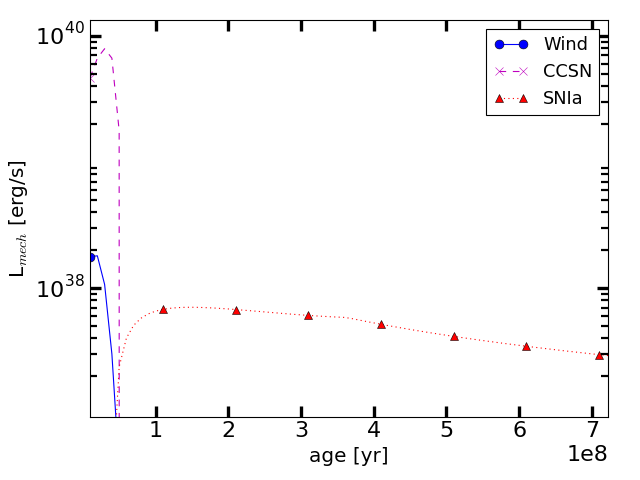

In [34]:
fign= fign + 1
fig=plt.figure(fign)
ax=plt.gca()
s11.plot_stellar_param(fig=fign,quantity='Ekindot_wind',
    label='Wind',marker='o',shape='-',color='b',markevery=10)
s11.plot_stellar_param(fig=fign,quantity='CCSN energy',label='CCSN',
                      marker='x',shape='--',color='m',markevery=10)
s11.plot_stellar_param(fig=fign,quantity='SNIa energy',label='SNIa',
                      marker='^',shape=':',color='r',markevery=10)
matplotlib.rcParams.update({'font.size': 20})
plt.xlabel('age [yr]')
plt.ylabel('L$_{mech}$ [erg/s]')
plt.xlim(1e7,1e10);plt.ylim(1e34,1e41)
ax.tick_params(length=6,width=2,which='both')
ax.tick_params(length=10,width=3,which='major')
ax.set_yticks([1e34,1e36,1e38,1e40,1e41])
plt.legend(loc=1,fontsize=16)
#style
fig.set_size_inches(8,6,forward=True)
ax.tick_params(length=6,width=2,which='both')
ax.tick_params(length=10,width=3,which='major')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
plt.tight_layout(h_pad=1.,pad=0.3)
matplotlib.rcParams.update({'font.size': 20})
plt.xscale('linear')

## Fig. 3 (bottom)

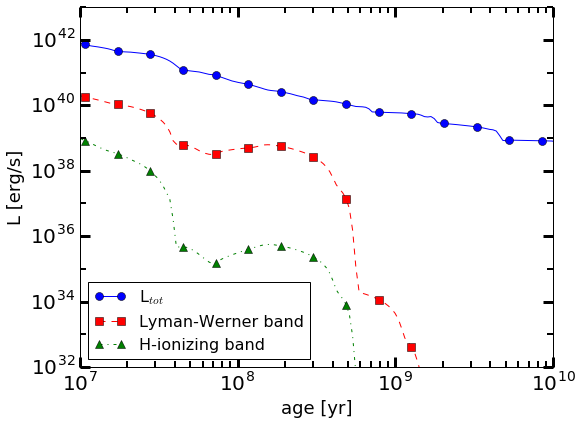

In [8]:
fign = fign + 1
fig=plt.figure(fign)
ax=plt.gca()
s1.plot_stellar_param(fig=fign,quantity='L_tot',label='L$_{tot}$',
                      marker='o',shape='-',color='b',markevery=10)
s1.plot_stellar_param(fig=fign,quantity='[11.18, 13.6]',label='Lyman-Werner band', #label='11.18 - 13.6eV',
                      marker='s',shape='--',color='r',markevery=10)
s1.plot_stellar_param(fig=fign,quantity='[13.6, 24.6]',label='H-ionizing band', #label='13.6 - 24.6eV',
                      marker='^',shape='-.',color='g',markevery=10)
plt.xscale('log');plt.yscale('log')
plt.legend(fontsize=16,loc=3);plt.xlabel('age [yr]');
#plt.ylabel('Luminosity [erg/s]')
plt.ylabel('L [erg/s]')
plt.xlim(1e7,1e10)
plt.ylim(1e32,1e43)
ax.set_yticks([1e32,1e34,1e36,1e38,1e40,1e42])
#style
fig.set_size_inches(8,6,forward=True)
ax.tick_params(length=6,width=2,which='both')
ax.tick_params(length=10,width=3,which='major')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
plt.tight_layout(h_pad=1.,pad=1.)
matplotlib.rcParams.update({'font.size': 20})
plt.savefig('luminosities_evol.png')